In [340]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from IPython.display import set_matplotlib_formats

warnings.filterwarnings("ignore")
set_matplotlib_formats('svg')
sns.set_style(style="darkgrid")

In [345]:
from scipy.stats import norm

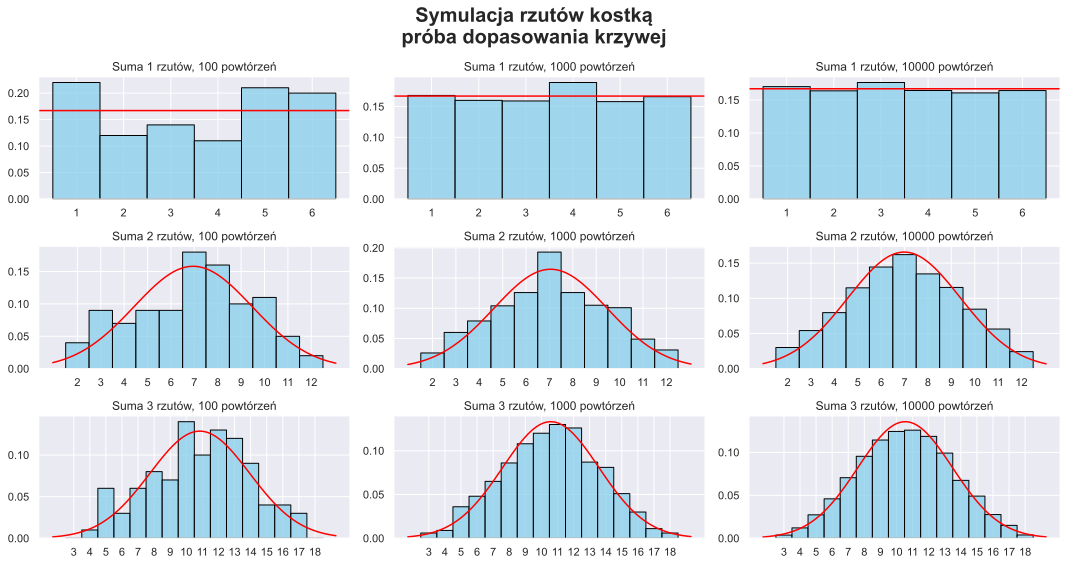

In [372]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8), layout="tight")
for x, throws2sum in enumerate([1, 2, 3]):
    for y, tries in enumerate([100, 1000, 10_000]) :
        rzuty = np.random.randint(1, 7, size=(tries, throws2sum))
        suma_rzutow = np.sum(rzuty, axis=1) 
        sns.histplot(suma_rzutow, 
                     bins=np.arange(throws2sum-.5, 6*(throws2sum)+1.5), 
                     ax=axes[x,y], 
                     kde=False, color='skyblue', edgecolor='black',
                     stat="probability")
        axes[x, y].set_xticks(np.arange(throws2sum, 6*(throws2sum)+1))
        axes[x, y].set_title(f'Suma {throws2sum} rzutów, {tries} powtórzeń')
        axes[x, y].set_ylabel("")
        
        
        if throws2sum==1:
            # plt.hlines(y=.167, xmin=0.2, xmax=7., color="red", axes=axes[x, y])
            axes[x, y].axhline(y=.167, xmin=0, xmax=7., color="red")
        else:
            mu, std = norm.fit(suma_rzutow)
            xmin, xmax = axes[x, y].get_xlim()
            x_vals = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x_vals, mu, std)
            sns.lineplot(x=x_vals, y=p, color='red', ax=axes[x][y])

fig.suptitle("Symulacja rzutów kostką\npróba dopasowania krzywej", weight="bold", fontsize=20)
plt.show()

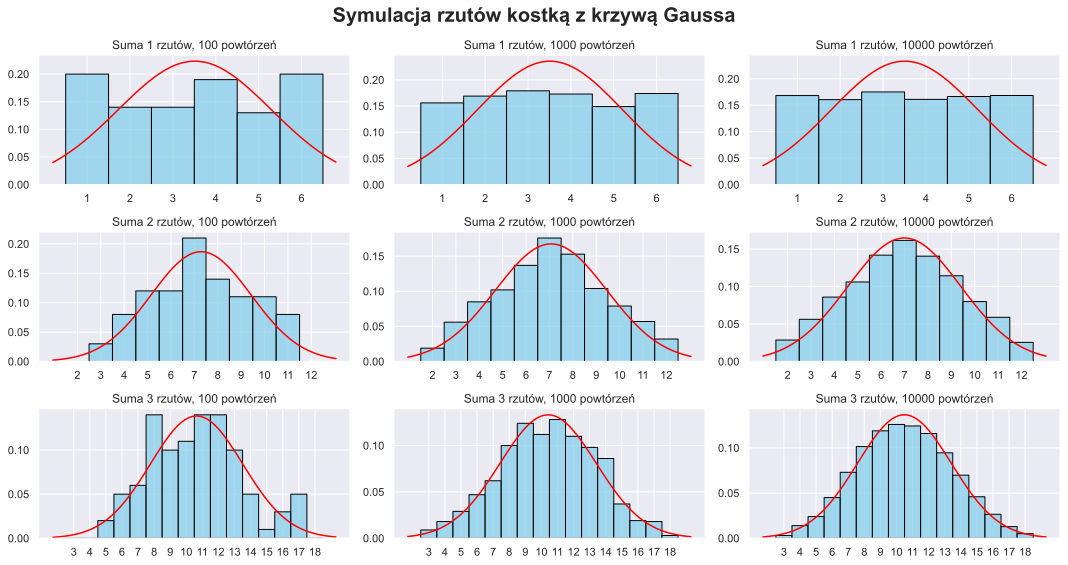

In [356]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8), tight_layout=True)

# Loop through different numbers of throws and tries
for x, throws2sum in enumerate([1, 2, 3]):
    for y, tries in enumerate([100, 1000, 10_000]):
        # Simulate dice throws
        rzuty = np.random.randint(1, 7, size=(tries, throws2sum))
        suma_rzutow = np.sum(rzuty, axis=1)

        # Plot histogram
        sns.histplot(
            suma_rzutow,
            bins=np.arange(throws2sum - 0.5, 6 * throws2sum + 1.5),
            ax=axes[x, y],
            kde=False,
            color='skyblue',
            edgecolor='black',
            stat="probability"
        )

        axes[x, y].set_xticks(np.arange(throws2sum, 6 * throws2sum + 1))
        axes[x, y].set_title(f'Suma {throws2sum} rzutów, {tries} powtórzeń')
        axes[x, y].set_ylabel("")

        # Fit a normal distribution to the data
        mu, std = norm.fit(suma_rzutow)

        # Plot the Gaussian curve
        xmin, xmax = axes[x, y].get_xlim()
        x_vals = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x_vals, mu, std)
        sns.lineplot(x=x_vals, y=p, color='red', ax=axes[x, y])

# Set the main title
fig.suptitle("Symulacja rzutów kostką z krzywą Gaussa", weight="bold", fontsize=20)

# Show the plot
plt.show()


In [121]:
x = np.zeros((6, 6))
for i in range(1, 7):
    for j in range(1, 7):
        x[i-1][j-1] = i+j
pd.DataFrame(x, index=(range(1, 7)), columns=range(1, 7)).astype(int)           

,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [125]:
from math import sqrt, pi, e

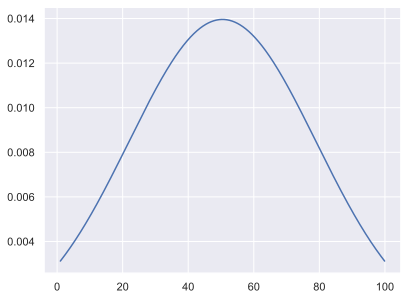

In [137]:
from math import sqrt, pi, e

X = np.arange(1, 100, .1)
N = lambda x, mu, sigma: 1/(sqrt(2*pi)*sigma)*e**-(((x-mu)**2)/(2*sigma**2))
plt.plot(X, N(X, X.mean(), X.std()))

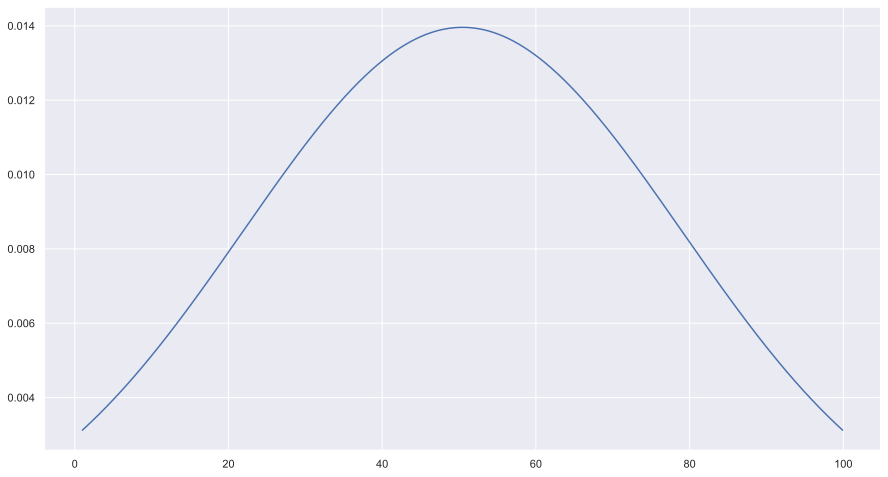

In [141]:
from scipy.stats import norm

plt.figure(figsize=(15, 8))
plt.plot(X, norm.pdf(X, X.mean(), X.std()))
plt.show()

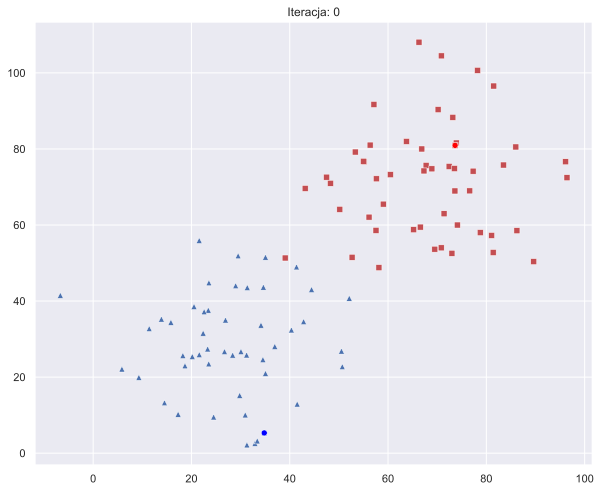

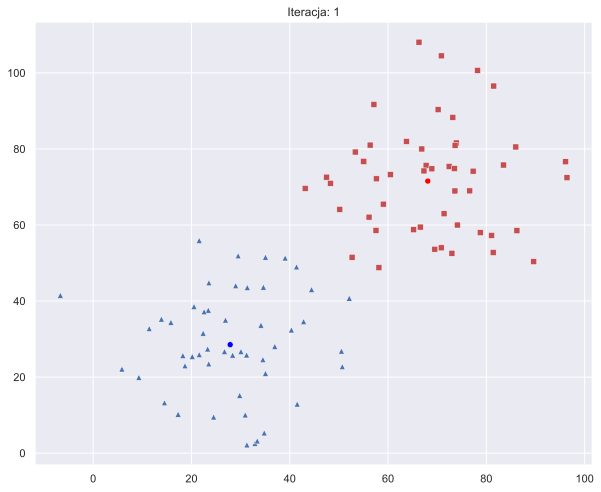

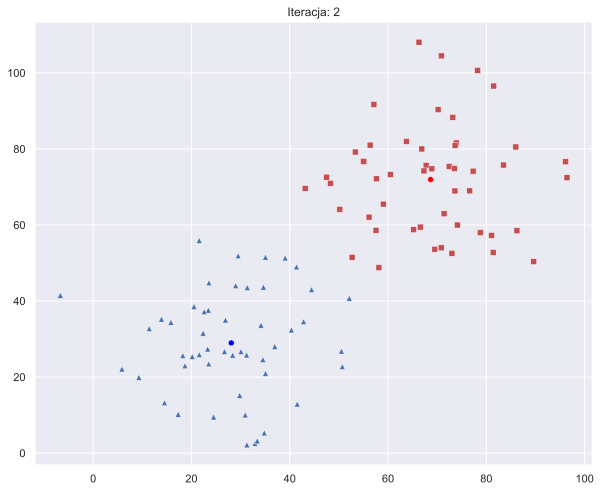

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 100
centers = [(30, 30), (70, 70)]

X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=14, random_state=42)

# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], color="k", marker="s")
# sns.scatterplot(x=X[:, 0], y=X[:, 1], color="k", marker="^")
# sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color=["red", "blue"])
# plt.title('Iteracja: 0')
# plt.show()

k=2
centroids = np.array([X[i] for i in np.random.choice(len(X), k, replace=False)])

plt.scatter
max_iters = 100
for i in range(max_iters):
        # Przypisanie punktów do najbliższego centrum
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Aktualizacja centroidów
        new_centroids = [np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        
                
        c1 = np.vstack(clusters[0])
        c2 = np.vstack(clusters[1])
        c = np.vstack(centroids)
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=c1[:, 0], y=c1[:, 1], color="r", marker="s")
        sns.scatterplot(x=c2[:, 0], y=c2[:, 1], color="b", marker="^")
        sns.scatterplot(x=c[:, 0], y=c[:, 1], color=["red", "blue"])
        plt.title(f"Iteracja: {i}")
        plt.show()
        
        # Sprawdzenie warunku stopu
        if np.all(np.array(new_centroids) == centroids):
            break
        
        centroids = new_centroids


In [216]:
import numpy as np
from sklearn.datasets import make_blobs
np.random.seed(1)
# data1 = np.random.randint(low=0,high=30, size=(50, 2))
# data2 = np.random.randint(low=60,high=100, size=(50, 2))
# data = np.concatenate((data1, data2), axis=0)
n_samples = 100
centers = [(30, 30), (70, 70)]
data, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=5, random_state=1)
k=2

# centroids = np.array([[40, 40],
#                       [50, 50]])
plt.figure(figsize=(10, 8))

# sns.scatterplot(x=data1[:, 0], y=data1[:, 1], color="k", marker="s")
# sns.scatterplot(x=data2[:, 0], y=data2[:, 1], color="k", marker="^")
# sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color=["red", "blue"])
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("Iteracja: 0")
plt.show()

# iter = 0
# # while True:
# iter+=1
# # Przypisanie punktów do najbliższego centrum
# clusters = [[] for _ in range(k)]
# for point in data:
#     distances = [np.linalg.norm(point - centroid) for centroid in centroids]
#     cluster_idx = np.argmin(distances)
#     clusters[cluster_idx].append(point)
# print(np.vstack(clusters[0]))
# # Aktualizacja centroidów
# new_centroids = [np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)]
# print(new_centroids)
# plt.figure(figsize=(10, 8))
# c1 = np.vstack(clusters[0])
# c2 = np.vstack(clusters[1])
# nc = np.vstack(new_centroids)
# sns.scatterplot(x=c1[:, 0], y=c1[:, 1], color="r", marker="s")
# sns.scatterplot(x=c2[:, 0], y=c2[:, 1], color="b", marker="^")
# sns.scatterplot(x=nc[:, 0], y=nc[:, 1], color=["red", "blue"])
# plt.title("Iteracja: 0")
# plt.show()

# # Sprawdzenie warunku stopu
# if np.all(np.array(new_centroids) == centroids):
#     pass

# centroids = new_centroids


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1000x800 with 0 Axes>

In [191]:
points = [(40, 40), (50, 50)]

# Rozpakowanie współrzędnych punktów
x, y = zip(*points)
x

(40, 50)

In [189]:
chuj[1]

array([50, 50])

In [162]:
data1 = np.random.randint(low=0,high=30, size=(50, 2))
data2 = np.random.randint(low=60,high=100, size=(50, 2))

In [172]:
data = np.concatenate((data1, data2), axis=0)

array([[ 7, 18],
       [ 8, 23],
       [14, 18],
       [ 5, 18],
       [26,  0],
       [ 1, 21],
       [ 8,  9],
       [25, 14],
       [20, 28],
       [ 7,  5],
       [ 2, 22],
       [ 9,  2],
       [ 6, 14],
       [ 3, 17],
       [ 3, 12],
       [15,  9],
       [28,  3],
       [ 4,  1],
       [ 2, 27],
       [ 1,  9],
       [ 8, 24],
       [28, 11],
       [16, 17],
       [14, 20],
       [16, 24],
       [13, 11],
       [16, 19],
       [17, 11],
       [15, 20],
       [12, 17],
       [ 5, 15],
       [18, 14],
       [12, 18],
       [ 8, 27],
       [20, 13],
       [ 8,  9],
       [13,  5],
       [28, 18],
       [17,  8],
       [21,  1],
       [21, 25],
       [ 3,  8],
       [26, 10],
       [23, 19],
       [22,  8],
       [ 6, 20],
       [13, 29],
       [22,  9],
       [ 9, 11],
       [20, 11],
       [82, 92],
       [90, 82],
       [96, 68],
       [93, 64],
       [79, 70],
       [97, 84],
       [92, 88],
       [71, 74],
       [95, 65

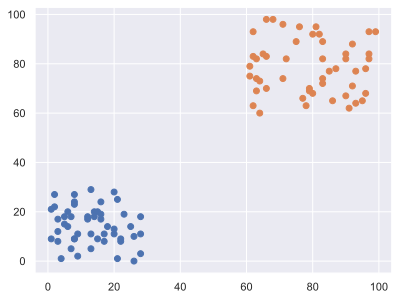

In [164]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.sacatter(data2[:, 0], data2[:, 1])
plt.show()

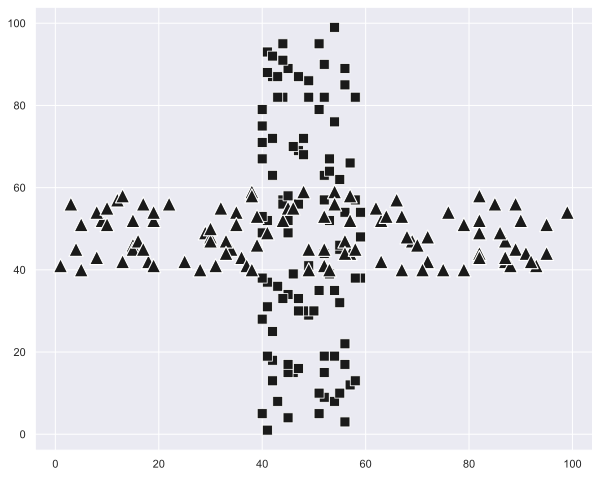

In [334]:
data0 = np.random.randint(40, 60, 100)
data1 = np.random.randint(0, 100, 100)

data_1 = np.vstack((data0, data1)).transpose()
data_2 =np.vstack((data_1[:, 1], data_1[:, 0])).transpose()

plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_1[:, 0], y=data_1[:, 1], marker="s", color="k", s=100)
sns.scatterplot(x=data_2[:, 0], y=data_2[:, 1], marker="^", color="k", s=200)
plt.show()



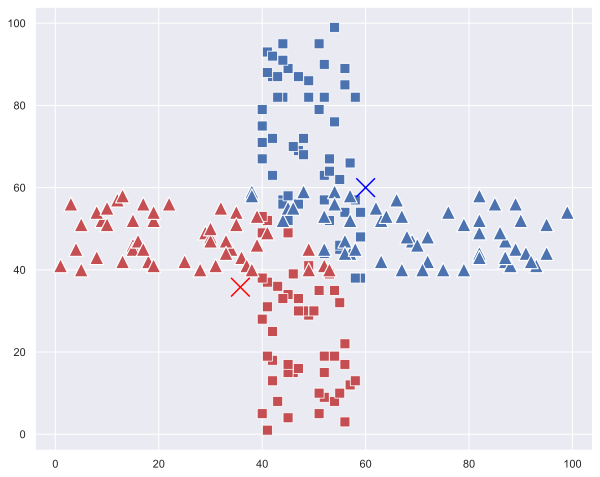

In [335]:
data = np.vstack((data_1, data_2))

k=2
centroids = np.array([data[i] for i in np.random.choice(len(data), k, replace=False)])

max_iters = 100
for i in range(max_iters):
        # Przypisanie punktów do najbliższego centrum
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Aktualizacja centroidów
        new_centroids = [np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        
        # Sprawdzenie warunku stopu
        if np.all(np.array(new_centroids) == centroids):
            break
        
        centroids = new_centroids

c1 = np.vstack(clusters[0])
c2 = np.vstack(clusters[1])
c = np.vstack(centroids)
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=c1[:, 0], y=c1[:, 1], color="r")
# sns.scatterplot(x=c2[:, 0], y=c2[:, 1], color="b")
# sns.scatterplot(x=c[:, 0], y=c[:, 1], color=["red", "blue"], markers="o")
# plt.show()


np.any(np.all(data_1 == data[0], axis=1))

plt.figure(figsize=(10, 8))
for point in data:
    marker = "s" if np.any(np.all(data_1 == point, axis=1)) else "^"
    color = "r" if np.any(np.all(c1 == point, axis=1)) else "b"
    size = 100 if marker=="s" else 200
    point = pd.DataFrame(point)
    sns.scatterplot(x=point.iloc[0], y=point.iloc[1], color=color, marker=marker, s=size)
sns.scatterplot(x=c[:, 0], y=c[:, 1], color=["red", "blue"], marker="x", s=350)
plt.xlabel("")
plt.ylabel("")
plt.show()